## Free Energy of Mixing Liquid-Liquid Equilibrium
This code plots the free of the mixing of two pure liquids assuming the $\underline{G}^{ex}$ follows a one-constant Margules gibbs free excess equation. Using the stability condition I compute and plot the plait point, tie lines, and corresponding compositions after phase separation.

### Imports

In [170]:
#Imports
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
mpl.rcParams['figure.dpi'] = 115

## Equation Setup

In [171]:
x = np.linspace(0,1,1000)

#Molar gibbs free energy of pure componen 1
g1 = 0

#Molar gibbs free energy of pure componen 1
g2 = 0.5

#Margules constant (A) vector
A = [0,2,3,5,8,10]

#Gibbs free energy vector
G = [[] for i in range(len(A))]

#Loop to add gibbs free energy values at varying compositions (x) and margules constant (A)
for i in range(len(A)):
    for j in range(len(x)):

        #if mole fractions are above 0 o below 1. At x = 0 or x = 1, the computer gets and error due
        #to log(x) or log(1-x) producing negative infinity.
        if x[j] > 0 and (1-x[j]) > 0:
            G[i].append(x[j]*g1 + (1-x[j])*g2 + x[j]*m.log(x[j]) + (1-x[j])*m.log(1-x[j]) + A[i]*x[j]*(1-x[j]))
        
        else:
            G[i].append(x[j]*g1 + (1-x[j])*g2 + A[i]*x[j]*(1-x[j]))

#Mole fractions at limit of stability
xb = [[0.5 - m.sqrt(1-2/A[i])/2, 0.5 + m.sqrt(1-2/A[i])/2] for i in range(1,len(A))]

#Gibbs free energy vector at limit of stability
Gb = [[] for i in range(len(xb))]
for i in range(len(xb)):
    Gb[i].append(xb[i][0]*g1 + (1-xb[i][0])*g2 + xb[i][0]*m.log(xb[i][0]) + (1-xb[i][0])*m.log(1-xb[i][0]) + A[i+1]*xb[i][0]*(1-xb[i][0]))
    Gb[i].append(xb[i][1]*g1 + (1-xb[i][1])*g2 + xb[i][1]*m.log(xb[i][1]) + (1-xb[i][1])*m.log(1-xb[i][1]) + A[i+1]*xb[i][1]*(1-xb[i][1]))

#Slope vector for each tie line alone gibbs free energy graph
slope = []

#Computes tie line slopes
for i in range(len(xb)):
    if (xb[i][1] - xb[i][0]) > 0:
        slope.append((Gb[i][1]-Gb[i][0])/(xb[i][1] - xb[i][0]))

    else:
        slope.append(0)

#computes mole fraction range for tie-line plotting
x_line = [np.linspace(xb[i][0],xb[i][1], 10) for i in range(len(xb))]

#Computes gibbs energies along tie line for plotting
G_line = [[Gb[i][0] + 
            slope[i]*(x_line[i][j] - xb[i][0]) for j in range(len(x_line[i]))] for i in range(len(x_line))]

## Gibbs Energy Plotting

[]

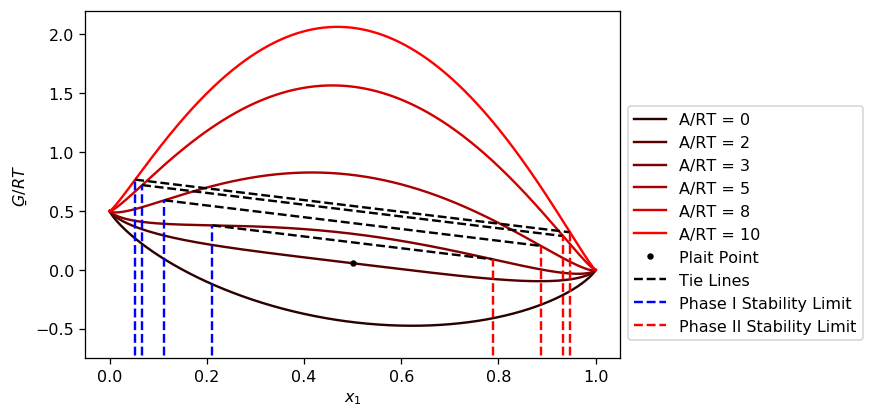

In [172]:
for i in range(len(A)):
    plt.plot(x,G[i], '-', color = (1/(len(A)) + (i/len(A)), 0,0), label = 'A/RT = ' + str(A[i]))
    plt.xlabel('$x_1$')
    plt.ylabel(r'$\underbar \!\!\! G/RT$')
    plt.legend() 

for i in range(1,len(xb)):
    plt.plot(x_line[i], G_line[i], '--', color = 'black')
    plt.plot(np.linspace(xb[i][0], xb[i][0],100), np.linspace(-5, Gb[i][0],100), '--', color = 'blue' )
    plt.plot(np.linspace(xb[i][1], xb[i][1],100), np.linspace(-5, Gb[i][1],100), '--', color = 'red')
    plt.xlabel('$x_1$')
    plt.ylabel(r'$\underbar \!\!\! G/RT$')
    plt.ylim(-.75,2.2)

plt.plot(xb[0][0], Gb[0][0], '.', color = 'black', label = 'Plait Point' )
plt.plot([],[], '--', color = 'black', label = 'Tie Lines' )
plt.plot([],[], '--', color = 'blue', label = 'Phase I Stability Limit' )
plt.plot([],[], '--', color = 'red', label = 'Phase II Stability Limit' )
plt.legend(bbox_to_anchor =(1, 0.75))
plt.plot()

## Temperature Effects

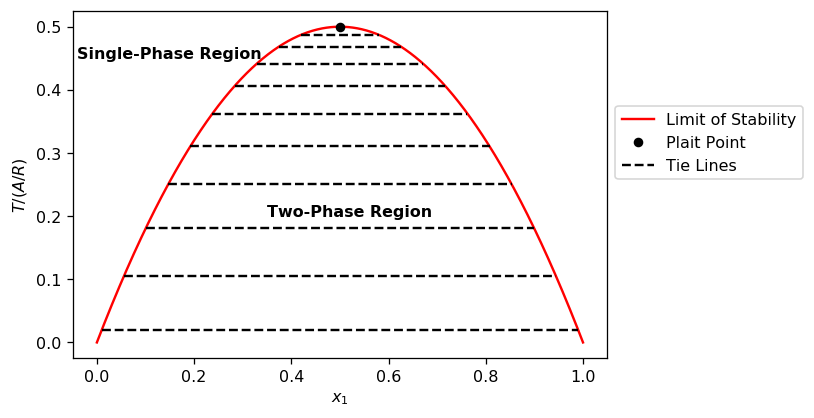

In [173]:
T = 2*x*(1-x)
x_plot = np.linspace(0.01,0.42,10)
plt.plot(x,T, '-', color = 'red', label = 'Limit of Stability')
for i in range(len(x_plot)):
    #Plotting each horizontal tie line
    plt.plot([x_plot[i],(1-x_plot[i])], [2*(x_plot[i])*(1-x_plot[i]),2*(x_plot[i])*(1-x_plot[i])], '--', color = 'black')
plt.plot(0.5,0.5, '.', color ='black', label = 'Plait Point', markersize = '10')
plt.plot([],[], '--', color ='black', label = 'Tie Lines')
plt.text(-0.04,0.45, 'Single-Phase Region', fontweight = 'bold')
plt.text(0.35,0.20, 'Two-Phase Region', fontweight = 'bold')
plt.xlabel('$x_1$')
plt.ylabel('$T/(A/R)$')
plt.legend(bbox_to_anchor =(1, 0.75))
plt.show()